
 x via Inverse A
 [-8.5698482  11.66987644 -2.76280268] 


 x via Elimination 
 [-8.5698482  11.66987644 -2.76280268] 
 Fit to Parabola

y(x) = a0 + a1 x + a2 x^2
 a0 = 1.0 a1 = 1.1 a2 = 1.24

 i   xi     yi    yfit   
 0 1.000  0.520  0.3372256
 1 1.100  0.800  0.9240246
 2 1.240  0.700  1.6527132
 3 1.350  1.800  2.1492771
 4 1.451  2.900  2.5463350
 5 1.500  2.900  2.7186604
 6 1.920  3.600  3.6515188


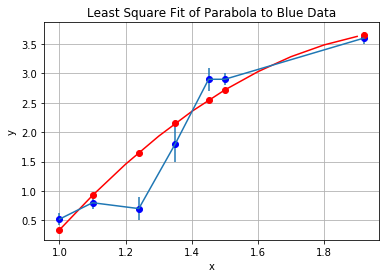

In [11]:
""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS"
    by RH Landau, MJ Paez, and CC Bordeianu (deceased)
    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, 
    C Bordeianu, Univ Bucharest, 2020. 
    Please respect copyright & acknowledge our work."""

# Fit.ipynb: Linear least square fit via matrix solution

import matplotlib.pyplot as p 
import numpy as np
from numpy.linalg import *

Nd = 7
A = np.zeros( (3,3), float );  bvec = np.zeros((3,1), float)  # Declare
ss= sx = sxx = sy = sxxx = sxxxx = sxy = sxy = sxxy = 0.
x = np.array([1., 1.1, 1.24, 1.35,  1.451, 1.5, 1.92])           
y = np.array([0.52, 0.8, 0.7, 1.8, 2.9, 2.9, 3.6])               
sig = np.array([0.1, 0.1, 0.2, 0.3, 0.2, 0.1, 0.1])    # Error bars
xRange = np.arange(1.0, 2.0, 0.1)                      # For plots
p.plot(x, y, 'bo')                                  # Blue data
p.errorbar(x,y,sig)                                      
p.title('Least Square Fit of Parabola to Blue Data')                           
p.xlabel('x');  p.ylabel('y');   p.grid(True)        # Plot grid

for i in range(0, Nd):                                      
        sig2 = sig[i] * sig[i]
        ss  += 1. / sig2; sx += x[i]/sig2; sy += y[i]/sig2
        rhl  = x[i] * x[i]; sxx += rhl/sig2;  sxxy += rhl*y[i]/sig2
        sxy += x[i]*y[i]/sig2; sxxx +=rhl*x[i]/sig2; sxxxx +=rhl*rhl/sig2
A    = np.array([ [ss,sx,sxx], [sx,sxx,sxxx], [sxx,sxxx,sxxxx] ])
bvec = np.array([sy, sxy, sxxy])
xvec = np.dot(inv(A), bvec)                  # Invert matrix
print('\n x via Inverse A\n', xvec, '\n' )
xvec = solve(A, bvec)                   # Solve via elimination
print('\n x via Elimination \n', xvec, '\n Fit to Parabola\n') 
print('y(x) = a0 + a1 x + a2 x^2\n a0 =', x[0],'a1 =', x[1], 'a2 =', x[2])      
print('\n i   xi     yi    yfit   ')
for i in range(0, Nd):
    s = xvec[0] + xvec[1]*x[i] + xvec[2]*x[i]*x[i]
    print(" %d %5.3f  %5.3f  %8.7f"  %(i, x[i], y[i], s))
# red line is the fit, red dots the fits at y[i]m 
curve  = xvec[0] + xvec[1]*xRange + xvec[2]*xRange**2
points = xvec[0] + xvec[1]*x + xvec[2]*x**2
p.plot(xRange, curve,'r', x, points, 'ro')
p.show()